In [1]:
from utils.load_dataset import *
from utils.custom_utils import *

In [2]:
valid = load_real_valid(real_valid_txt)
test_df = load_testing(test_txt)

valid_dataset = FallenPeople(valid, f'{REAL_DATASET}/valid', FallenPeople.valid_test_transform())
test_dataset = FallenPeople(test_df, TESTING, FallenPeople.valid_test_transform())

In [7]:
def load_model(path):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    # create a Faster R-CNN model without pre-trained
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)

    num_classes = 3 # wheat or not(background)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # replace the pre-trained model's head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model'])
    # load the trained weights
    #model.load_state_dict(torch.load(path, map_location=device))
    model.eval()

    # move model to the right device
    _ = model.to(device)
    return model, device

In [9]:
model, device = load_model("./models/checkpoint_train_real.pth")
#model = torch.load("./models/checkpoint_train_real.pth")
test_list = [random.randint(0,len(test_df['img_path'].unique())-1) for i in range(5)]
f = open(filename("txt","results/virtual_and_real_fixed_"),"a")
#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

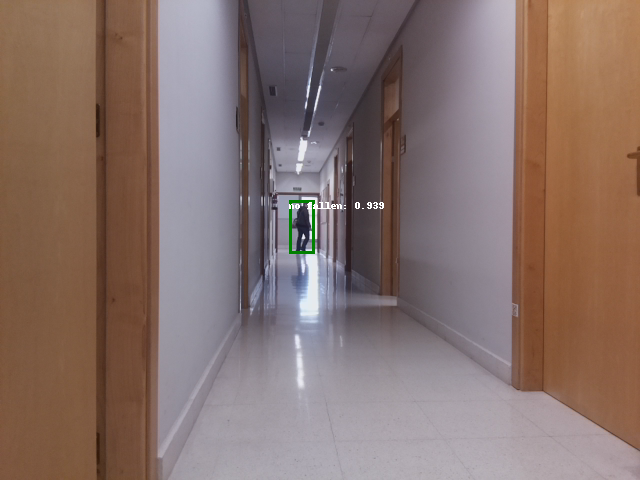

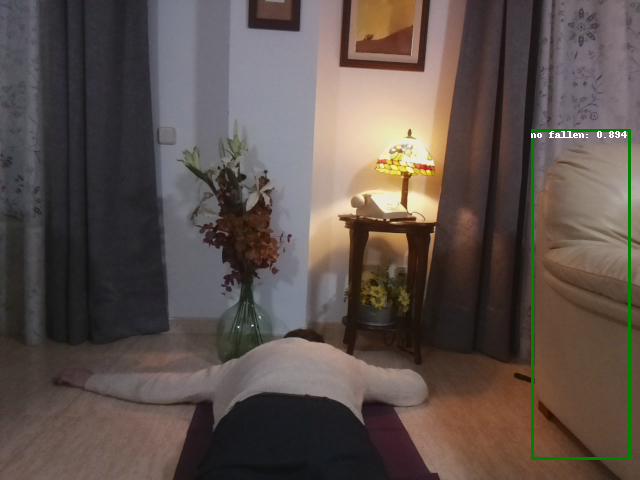

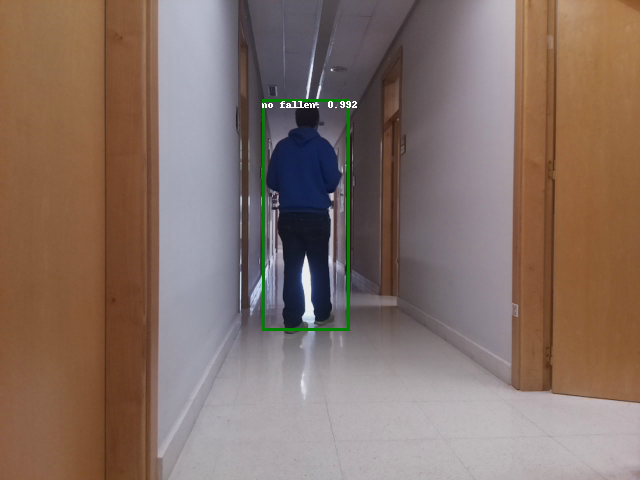

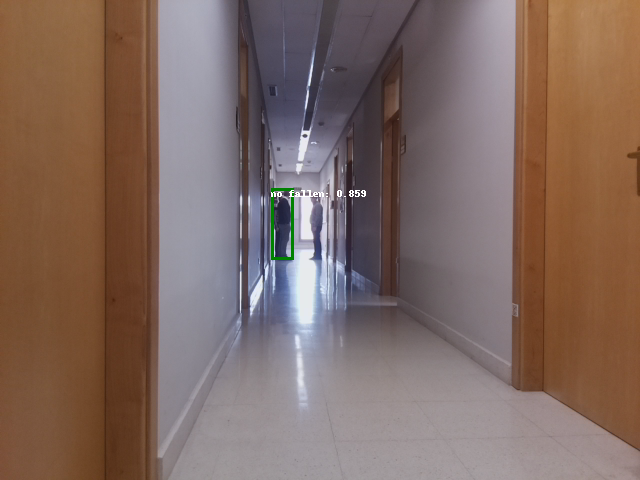

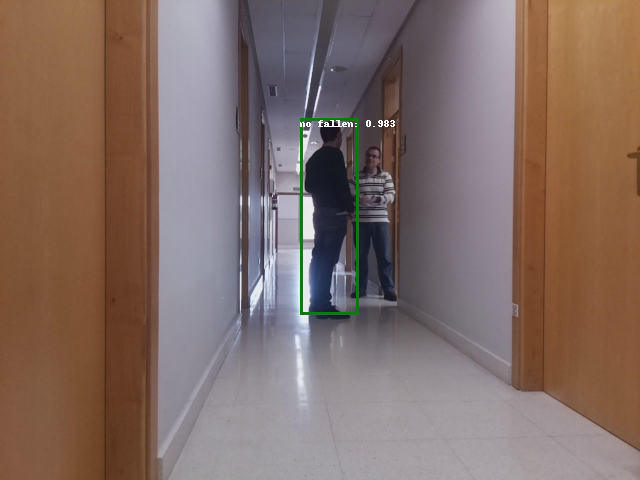

In [10]:
visualize_prediction(test_dataset, test_list, model, device)

In [15]:
title = "==== TEST RESULT ====\n"
f.write(title)

22

In [11]:
accuracy, tn, tp, fn, fp = classifier_performance(test_dataset, model, device)

100%|██████████| 959/959 [02:40<00:00,  5.99it/s]


CLASSIFICATION PERFORMANCE

|          | POSITIVE   | NEGATIVE   |
|----------|------------|------------|
| POSITIVE | TP: 376    | FP: 33     |
| NEGATIVE | FN: 10     | TN: 540    |
Accuracy: 0.96
Recall: 0.97
Precision: 0.92
F1-score: 0.95


In [17]:
conf_matrix = [["POSITIVE",f"TP: {tp}",f"FP: {fp}"],["NEGATIVE",f"FN: {fn}",f"TN: {tn}"]]
recall = tp / (tp+fn)
precision = tp/ (tp+fp)
f1_score = 2/((1/recall)+(1/precision))
print(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1_score:.2f}")

# f.write(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
# f.write(f"\nAccuracy: {accuracy:.2f}\n")
# f.write(f"Recall: {recall:.2f}\n")
# f.write(f"Precision: {precision:.2f}\n")
# f.write(f"F1-score: {f1_score:.2f}\n")

|          | POSITIVE   | NEGATIVE   |
|----------|------------|------------|
| POSITIVE | TP: 369    | FP: 207    |
| NEGATIVE | FN: 15     | TN: 368    |
Accuracy: 0.77
Recall: 0.96
Precision: 0.64
F1-score: 0.77


15

# VALIDATION

In [12]:
valid_list = [random.randint(0,len(valid['img_path'].unique())-1) for i in range(5)]

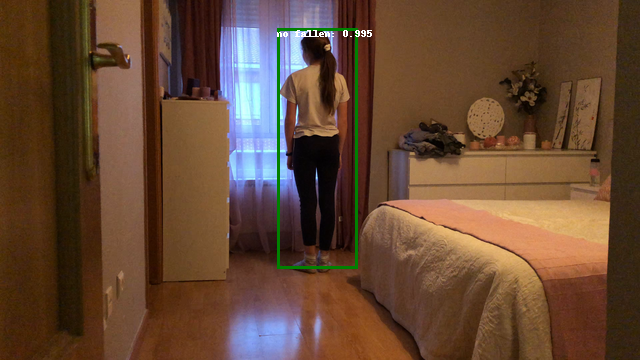

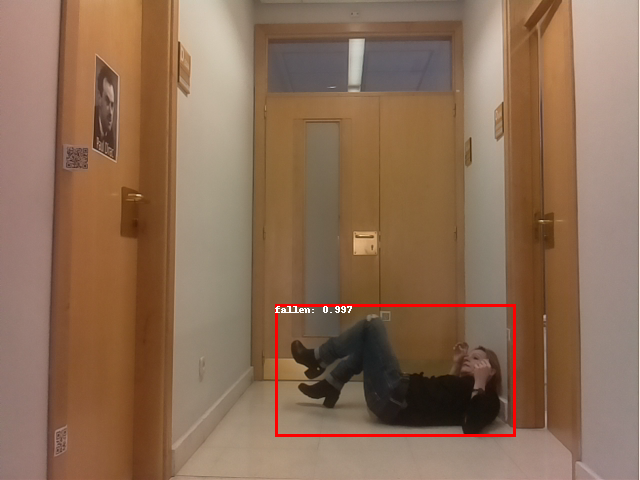

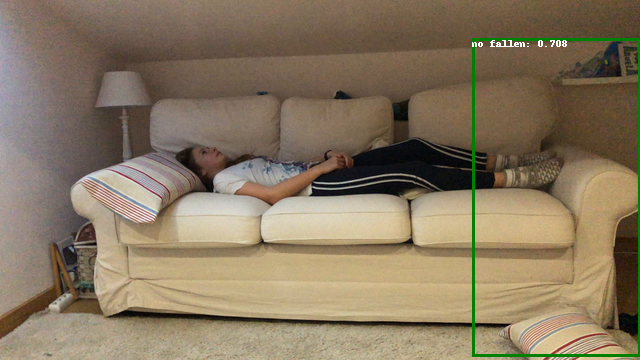

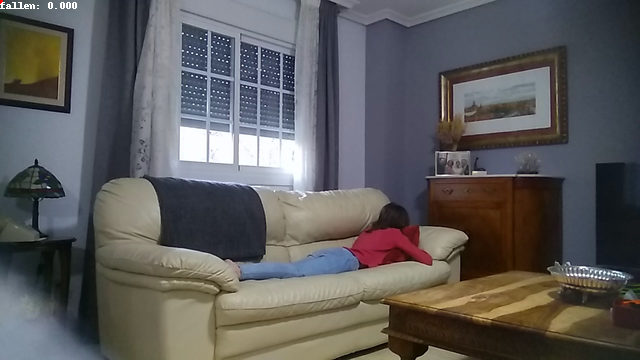

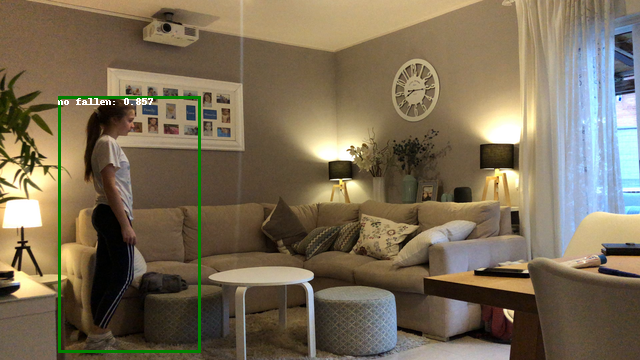

In [13]:
visualize_prediction(valid_dataset, valid_list, model, device)

In [18]:
title_valid = "\n==== VALID RESULT ====\n"
f.write(title_valid)

23

In [14]:
accuracy, tn, tp, fn, fp = classifier_performance(valid_dataset, model, device)

100%|██████████| 1174/1174 [02:07<00:00,  9.24it/s]


CLASSIFICATION PERFORMANCE

|          | POSITIVE   | NEGATIVE   |
|----------|------------|------------|
| POSITIVE | TP: 746    | FP: 214    |
| NEGATIVE | FN: 19     | TN: 195    |
Accuracy: 0.80
Recall: 0.98
Precision: 0.78
F1-score: 0.86


In [21]:
conf_matrix = [["POSITIVE",f"TP: {tp}",f"FP: {fp}"],["NEGATIVE",f"FN: {fn}",f"TN: {tn}"]]
recall = tp / (tp+fn)
precision = tp/ (tp+fp)
f1_score = 2/((1/recall)+(1/precision))
print(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f} ")
print(f"F1-score: {f1_score:.2f}")

f.write(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
f.write(f"\nAccuracy: {accuracy:.2f}\n")
f.write(f"Recall: {recall:.2f}\n")
f.write(f"Precision: {precision:.2f}\n")
f.write(f"F1-score: {f1_score:.2f}\n")
f.close()

|          | POSITIVE   | NEGATIVE   |
|----------|------------|------------|
| POSITIVE | TP: 711    | FP: 92     |
| NEGATIVE | FN: 54     | TN: 317    |
Accuracy: 0.88
Recall: 0.93
Precision: 0.89 
F1-score: 0.91


ValueError: I/O operation on closed file.